# 1. Business Understanding

Many online mail order companies have a high return rate
(of up to 50%), with 97% of all returned products being able to be restocked
and can be sold. In order to resell the goods
goods, they must be identified, labeled, and restocked accordingly.
again.
Assuming that in 2020 185.5 million orders (Statista, 2021) with
6 items each (acceptance) would be received, then a return rate of 50% would mean that
of 50%, 556.5 million items would have to be re-identified and re-categorized.
To support this process and to facilitate identification of the
returned garments, image recognition software is to be developed that will
the associated categories of the individual garments on the basis of images.
of the individual garments on the basis of images.

# 2. Read Data

## 2.1. Import of Relavant Modules 

In [1]:
pip install tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Layer
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# Should be 2.5.0
tf.__version__

'2.16.1'

## 2.2 Read Data


The training- and test-data is already labeled and split up into two datasets

In [4]:
csv_file_train = "https://storage.googleapis.com/ml-service-repository-datastorage/Classification_of_clothing_through_images_fashion-mnist_train.csv"
csv_file_test = "https://storage.googleapis.com/ml-service-repository-datastorage/Classification_of_clothing_through_images_fashion-mnist_test.csv"
df_train = pd.read_csv(csv_file_train) 
df_test = pd.read_csv(csv_file_test)
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

## 2.3. Data Analysis

In [5]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Describe the dataframe, not really helpful in this case, but is shows that the data is not corrupted by evaluating:
- Label must be between 0 and 9
- Pixel values must be between 0 and 255 (non-negative)
- Count must be 60000 (train) 10000 (test)
- Maximum number of pixels must be 784 for all rows

In [6]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [7]:
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


Both test data and train data seems to be valid and uncorrupted

Define human readable names for the 10 categories

In [8]:
class_names = ['Top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

Split the dataset an check the distribution of each class (split could be also done later)

In [9]:
df_train, df_val = train_test_split(df_train, test_size=0.1, random_state=365)
print(f"{len(df_train)} train examples")
print(f"{len(df_val)} validation examples")
print(f"{len(df_test)} test examples")

54000 train examples
6000 validation examples
10000 test examples


Show the distribution for each set

In [10]:
def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = class_names[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

print("\nTRAIN DISTRIBUTION\n")
get_classes_distribution(df_train)
print("\nVALIDATION DISTRIBUTION\n")
get_classes_distribution(df_val)
print("\nTEST DISTRIBUTION\n")
get_classes_distribution(df_test)


TRAIN DISTRIBUTION

Sandal              :   5429 or 10.053703703703704%
Coat                :   5421 or 10.03888888888889%
Pullover            :   5407 or 10.012962962962963%
Dress               :   5405 or 10.00925925925926%
Ankle boot          :   5404 or 10.007407407407408%
Shirt               :   5397 or 9.994444444444445%
Top                 :   5396 or 9.992592592592594%
Sneaker             :   5395 or 9.99074074074074%
Trouser             :   5384 or 9.97037037037037%
Bag                 :   5362 or 9.92962962962963%

VALIDATION DISTRIBUTION

Bag                 :   638 or 10.633333333333333%
Trouser             :   616 or 10.266666666666667%
Sneaker             :   605 or 10.083333333333332%
Top                 :   604 or 10.066666666666666%
Shirt               :   603 or 10.05%
Ankle boot          :   596 or 9.933333333333334%
Dress               :   595 or 9.916666666666666%
Pullover            :   593 or 9.883333333333333%
Coat                :   579 or 9.65%
Sandal        

This is already helpful, we can see that it is quite evenly split.
Print the data as a pie chart, to make it even nicer.

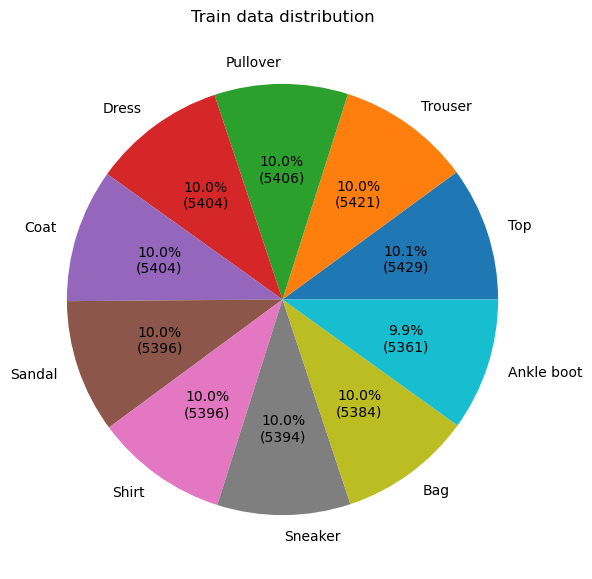

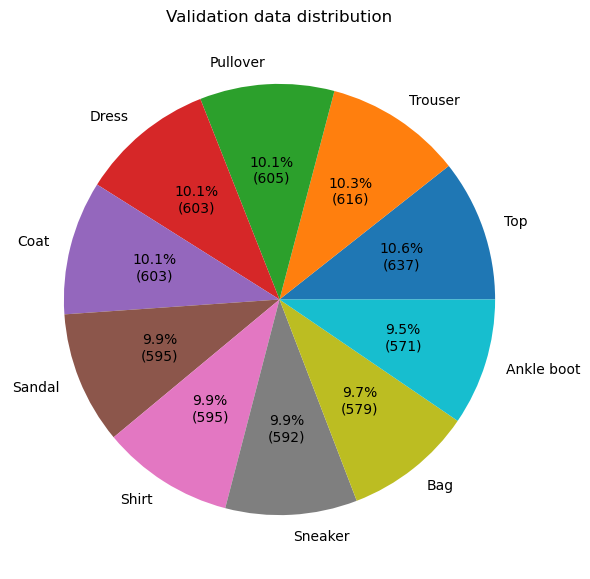

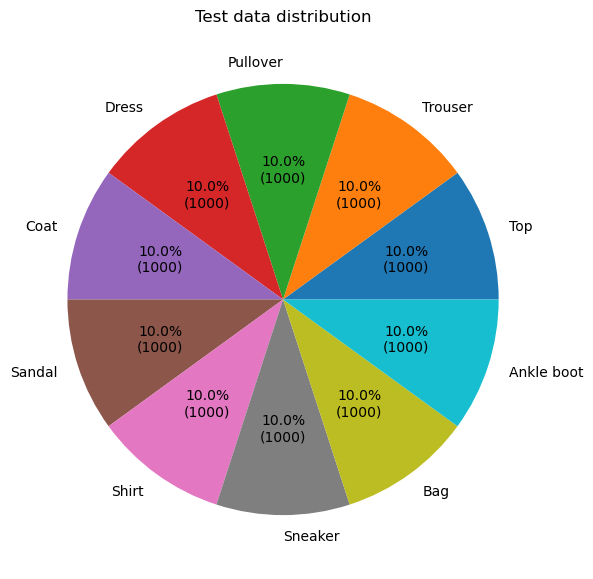

In [11]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_pie(title, data):
    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.pie(data, autopct = lambda pct: func(pct, data), labels = class_names)
    ax.set_title(title)
  
    # show plot
    plt.show()

plot_pie("Train data distribution", df_train["label"].value_counts())
plot_pie("Validation data distribution", df_val["label"].value_counts())
plot_pie("Test data distribution", df_test["label"].value_counts())

Print a single image

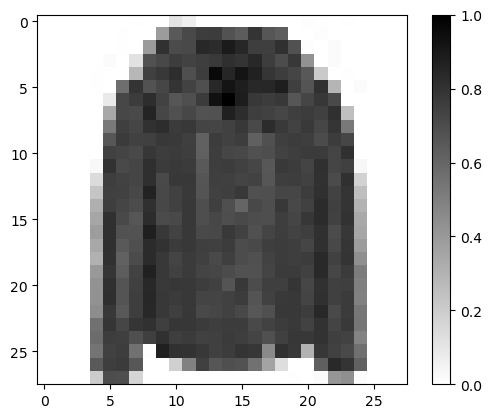

In [12]:
# Make copies of the data to allow easy exploration
df_train_exp_copy = df_train.copy() 
y_train_exp = df_train_exp_copy.pop('label').to_numpy()
x_train_exp = df_train_exp_copy.to_numpy()


# Take a single image, and remove the color dimension by reshaping
image = x_train_exp[0].reshape((28,28)) / 255.0

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Print one image from each category to see how they look like and how they differ

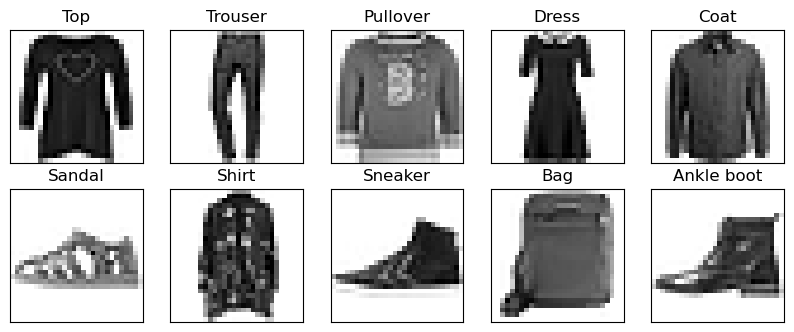

In [13]:
plt.figure(figsize=(10,10))
i = 0
for index in range(len(x_train_exp)):
    label = y_train_exp[index]
    image = x_train_exp[index] / 255.0
    if label == i:
        image = image.reshape((28,28))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image, cmap=plt.cm.binary)
        plt.title(class_names[label])
        i += 1
    if i == 10:
        break
plt.show()

# 3. Data preperation

## 3.1. Test and Train Data

In [14]:
df_train_copy = df_train.copy() 
y_train = df_train_copy.pop('label').to_numpy()
x_train = df_train_copy.to_numpy()
df_val_copy = df_val.copy() 
y_val = df_val_copy.pop('label').to_numpy()
x_val = df_val_copy.to_numpy()
df_test_copy = df_test.copy() 
y_test = df_test_copy.pop('label').to_numpy()
x_test = df_test_copy.to_numpy()

## 3.2. Feature Scaling

In [15]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

Convert the image shape from 784 to 28x28 (only if load as CSV with 784 columns)

In [16]:
IMG_ROWS = 28
IMG_COLS = 28
IMAGE_SHAPE = (IMG_ROWS, IMG_COLS, 1) 
x_train = x_train.reshape(x_train.shape[0], *IMAGE_SHAPE)
x_val = x_val.reshape(x_val.shape[0], *IMAGE_SHAPE)
x_test = x_test.reshape(x_test.shape[0], *IMAGE_SHAPE)

## 3.3. Convert Labels

In [17]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

Check the data shapes to get ensure that the data is in the correct format

In [18]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)


(54000, 28, 28, 1)
(54000, 10)
(6000, 28, 28, 1)
(6000, 10)
(10000, 28, 28, 1)
(10000, 10)


# 4. Modelling and Evaluation

Define how the model will look like. Below some descriptions for different Layer types.
The first trial of this model was just a DNN with simple dense layers, but the results can be improved by using a CNN.
As a start architecture the LeNet-5 implementation was chosen and then altered.
The hyperparameters could also be optimized with a Keras Optimizer which tries out several defined combinations.
The current parameters got chosen by exploration.

- Dense: receives all inputs from previous layer, creates dot product 
- Dropout layer: removes noise for overfitting, drops at specific rate
- Reshape layer: changes the shape of the input, not used
- Permute layer: alter shape of the input, not used
- ReapeatVector layer: repeats the input for fixed number of times, not used
- Flatten Layer: flattens the matrix
- MaxPooling2D Layer: reduces number of input
- Conv2D Layer: convolves an input

In [19]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.40))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

C:\Users\ar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,802 (3.10 MB)

 Trainable params: 813,802 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss= tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy']
)

Train/Fit the model

In [21]:
# Determine the maximum number of epochs
NUM_EPOCHS = 10
BATCH_SIZE = 64

# Fit the model, 
# specify the training data
# the total number of epochs
# and the validation data we just created 
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(x_val, y_val), 
    validation_steps=10,
    verbose =2
)

Epoch 1/10
844/844 - 9s - 10ms/step - accuracy: 0.8485 - loss: 0.4227 - val_accuracy: 0.9016 - val_loss: 0.2939
Epoch 2/10
844/844 - 7s - 9ms/step - accuracy: 0.8973 - loss: 0.2795 - val_accuracy: 0.9141 - val_loss: 0.2329
Epoch 3/10
844/844 - 7s - 9ms/step - accuracy: 0.9124 - loss: 0.2361 - val_accuracy: 0.9312 - val_loss: 0.2121
Epoch 4/10
844/844 - 9s - 10ms/step - accuracy: 0.9236 - loss: 0.2059 - val_accuracy: 0.9156 - val_loss: 0.2440
Epoch 5/10
844/844 - 9s - 10ms/step - accuracy: 0.9330 - loss: 0.1798 - val_accuracy: 0.9234 - val_loss: 0.1941
Epoch 6/10
844/844 - 9s - 10ms/step - accuracy: 0.9403 - loss: 0.1591 - val_accuracy: 0.9312 - val_loss: 0.1952
Epoch 7/10
844/844 - 9s - 11ms/step - accuracy: 0.9474 - loss: 0.1394 - val_accuracy: 0.9234 - val_loss: 0.1963
Epoch 8/10
844/844 - 9s - 11ms/step - accuracy: 0.9535 - loss: 0.1258 - val_accuracy: 0.9266 - val_loss: 0.2069
Epoch 9/10
844/844 - 10s - 12ms/step - accuracy: 0.9601 - loss: 0.1071 - val_accuracy: 0.9312 - val_loss: 

C:\Users\ar\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


We want do know how especially the loss changes over time

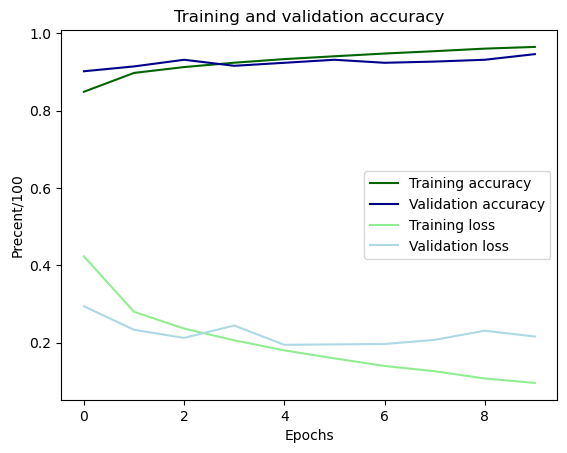

<Figure size 640x480 with 0 Axes>

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Precent/100")
plt.legend(loc=0)
plt.figure()


plt.show()

We can see that the model is performing quite well, but after the second epoch it starts to overfit. To prevent that we could try with different train-validation splits, add more dropout or restructure parts of the model.

Evaluate the test-data

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [24]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.22. Test accuracy: 93.17%


The model performs quite well with an accuracy of > 90% on the test-data. The loss is acceptable.

Show results by class

In [25]:
predicted_classes = (model.predict(x_test) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [26]:
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

         Top       0.91      0.85      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.89      0.89      1000
       Dress       0.92      0.97      0.94      1000
        Coat       0.93      0.86      0.89      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.81      0.82      0.81      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

   micro avg       0.94      0.93      0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000
 samples avg       0.93      0.93      0.93     10000



C:\Users\ar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
